In [1]:
%pwd

'/Users/pwang/Desktop/PYCHARM_GITHUB_PROJECTS/olfaction_evolution/notebooks'

In [2]:
%cd /Users/pwang/Desktop/PYCHARM_GITHUB_PROJECTS/olfaction_evolution/

/Users/pwang/Desktop/PYCHARM_GITHUB_PROJECTS/olfaction_evolution


In [3]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import tools
from pylab import *
import matplotlib.animation as animation
import matplotlib as mpl
import numpy as np
import os
import standard.analysis as sa
import tools
import matplotlib.pyplot as plt
import task
import tensorflow as tf
from model import FullModel

%matplotlib inline

In [4]:
mpl.rcParams['font.size'] = 15
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'arial'
mpl.rcParams['image.cmap']='jet'

In [5]:
path = 'files/cluster_coding100'
x = tools.load_all_results(path, argLast=True)


['files/cluster_coding100/000000', 'files/cluster_coding100/000001', 'files/cluster_coding100/000002', 'files/cluster_coding100/000003', 'files/cluster_coding100/000004', 'files/cluster_coding100/000005']


In [6]:
x.keys()

dict_keys(['w_bins', 'lin_bins', 'epoch', 'train_loss', 'train_acc', 'val_loss', 'val_acc', 'val_acc2', 'coding_level', 'coding_level_per_kc', 'coding_level_per_odor', 'log_hist', 'hist', 'kc_w_sum', 'lin_hist', 'sparsity', 'thres', 'sparsity_fixthres', 'NOISE_MODEL', 'N_CLASS', 'N_KC', 'N_ORN', 'N_ORN_DUPLICATION', 'N_PN', 'ORN_NOISE_STD', 'batch_size', 'coding_level_loss_alpha', 'combinatorial_density', 'data_dir', 'dataset', 'direct_glo', 'distort_input', 'extra_layer', 'extra_layer_neurons', 'hallem_path', 'has_special_odors', 'initial_pn2kc', 'initializer_or2orn', 'initializer_orn2pn', 'initializer_pn2kc', 'kc_bias', 'kc_dropout', 'kc_dropout_rate', 'kc_inputs', 'kc_loss', 'kc_loss_alpha', 'kc_loss_beta', 'kc_noise', 'kc_noise_std', 'kc_norm_post', 'kc_norm_pre', 'kc_prune_threshold', 'kc_prune_weak_weights', 'label_type', 'lr', 'mask_orn_activation_column', 'mask_orn_activation_row', 'max_epoch', 'mean_subtract_pn2kc', 'model', 'n_class_valence', 'n_combinatorial_classes', 'n_pro

In [7]:
w_bins_log = np.linspace(-20, 5, 200)

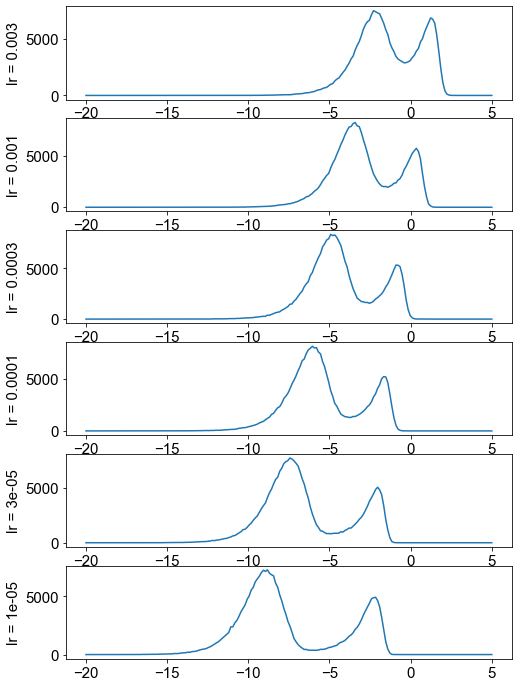

In [8]:
fig, axs =plt.subplots(6,figsize=(8,12))
for i in range(x['log_hist'].shape[0]):
    axs[i].plot(w_bins_log,x['log_hist'][i].T)
    axs[i].set_ylabel('lr = {}'.format(x['lr'][i]))

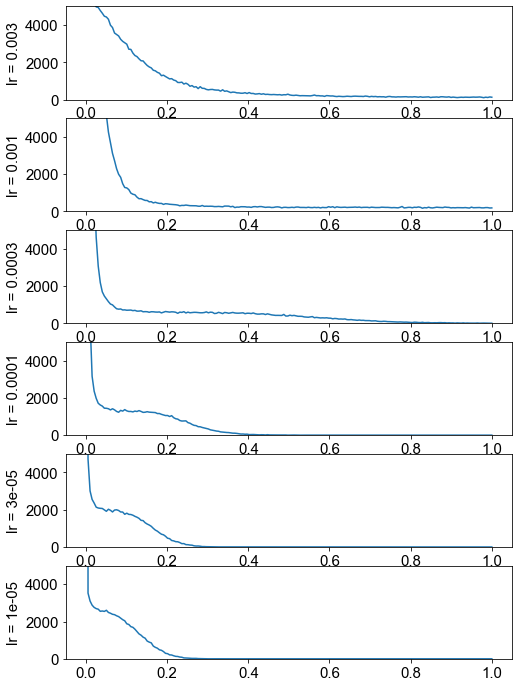

In [34]:
fig, axs =plt.subplots(6,figsize=(8,12))
lin_bins = np.linspace(0, 1, 200)
for i in range(x['log_hist'].shape[0]):
    axs[i].plot(lin_bins,x['hist'][i].T)
    plt.sca(axs[i])
    plt.ylim([0, 5000])
    plt.ylabel('lr = {}'.format(x['lr'][i]))

In [10]:
x.keys()

dict_keys(['w_bins', 'lin_bins', 'epoch', 'train_loss', 'train_acc', 'val_loss', 'val_acc', 'val_acc2', 'coding_level', 'coding_level_per_kc', 'coding_level_per_odor', 'log_hist', 'hist', 'kc_w_sum', 'lin_hist', 'sparsity', 'thres', 'sparsity_fixthres', 'NOISE_MODEL', 'N_CLASS', 'N_KC', 'N_ORN', 'N_ORN_DUPLICATION', 'N_PN', 'ORN_NOISE_STD', 'batch_size', 'coding_level_loss_alpha', 'combinatorial_density', 'data_dir', 'dataset', 'direct_glo', 'distort_input', 'extra_layer', 'extra_layer_neurons', 'hallem_path', 'has_special_odors', 'initial_pn2kc', 'initializer_or2orn', 'initializer_orn2pn', 'initializer_pn2kc', 'kc_bias', 'kc_dropout', 'kc_dropout_rate', 'kc_inputs', 'kc_loss', 'kc_loss_alpha', 'kc_loss_beta', 'kc_noise', 'kc_noise_std', 'kc_norm_post', 'kc_norm_pre', 'kc_prune_threshold', 'kc_prune_weak_weights', 'label_type', 'lr', 'mask_orn_activation_column', 'mask_orn_activation_row', 'max_epoch', 'mean_subtract_pn2kc', 'model', 'n_class_valence', 'n_combinatorial_classes', 'n_pro

In [11]:
x['coding_level']

array([0.20163208, 0.2       , 0.20204849, 0.2       , 0.20194756,
       0.2       , 0.20045596, 0.2       , 0.19812905, 0.2       ,
       0.19690977, 0.2       ])

In [12]:
x['train_acc']

array([0.74609375, 0.78515625, 0.7421875 , 0.7578125 , 0.76953125,
       0.73828125], dtype=float32)

In [13]:
x['sparsity'].mean(axis=1)

array([99.9996, 23.084 , 21.4392, 22.1884, 23.9192, 27.79  ])

In [14]:
x['thres']

array([5.39420574e-08, 4.40637776e-01, 1.39232245e-01, 4.88336830e-02,
       2.11583611e-02, 7.41230150e-03])

In [15]:
x['lr']

array([3.e-03, 1.e-03, 3.e-04, 1.e-04, 3.e-05, 1.e-05])

Text(0, 0.5, 'Sparsity')

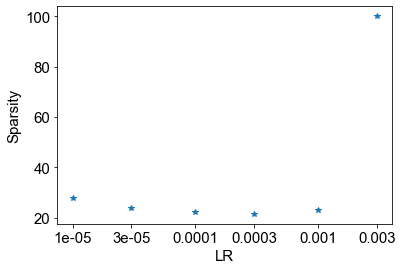

In [16]:
plt.plot(np.log(x['lr']), x['sparsity'].mean(axis=1), '*')
plt.xticks(np.log(x['lr']),x['lr'])
plt.xlabel('LR')
plt.ylabel('Sparsity')

Text(0, 0.5, 'Train Accuracy')

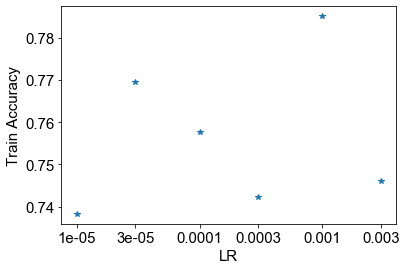

In [17]:
plt.plot(np.log(x['lr']), x['train_acc'], '*')
plt.xticks(np.log(x['lr']),x['lr'])
plt.xlabel('LR')
plt.ylabel('Train Accuracy')

Text(0, 0.5, 'Threshold')

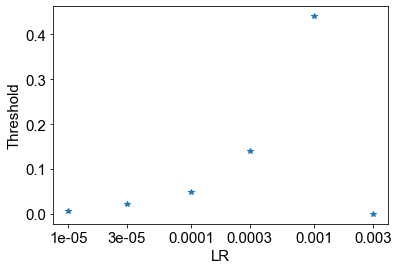

In [18]:
plt.plot(np.log(x['lr']), x['thres'], '*')
plt.xticks(np.log(x['lr']),x['lr'])
plt.xlabel('LR')
plt.ylabel('Threshold')

Text(0, 0.5, 'sparsity')

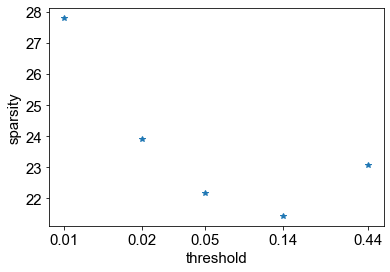

In [19]:
plt.plot(np.log(x['thres'])[1:], x['sparsity'].mean(axis=1)[1:], '*')
plt.xticks(np.log(x['thres'][1:]),np.round(x['thres'][1:],2))
plt.xlabel('threshold')
plt.ylabel('sparsity')

In [35]:
w_glo = tools.load_pickle(path, 'w_glo')[0]

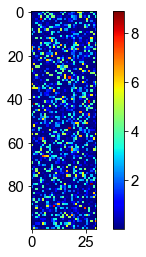

In [36]:
plt.imshow(w_glo[:,:30])
plt.colorbar()

(0, 10000)

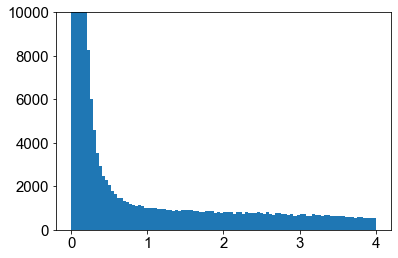

In [40]:
_ = plt.hist(w_glo.flatten(), bins=100, range = [0, 4])
plt.ylim([0, 10000])

In [23]:
log = tools.load_all_results(path, argLast=False)

['files/cluster_coding100/000000', 'files/cluster_coding100/000001', 'files/cluster_coding100/000002', 'files/cluster_coding100/000003', 'files/cluster_coding100/000004', 'files/cluster_coding100/000005']


/Users/pwang/Desktop/PYCHARM_GITHUB_PROJECTS/olfaction_evolution/tools.py:224: RuntimeWarning: divide by zero encountered in log
  res['train_logloss'] = np.log(res['train_loss'])


In [24]:
sp = np.mean(log['sparsity'], axis=2)

In [25]:
sp.shape

(6, 100)

In [27]:
from matplotlib import cm

start = 0.0
stop = 1.0
number_of_lines= sp.shape[0]
cm_subsection = np.linspace(start, stop, number_of_lines) 

colors = [ cm.cool(x) for x in cm_subsection ]

In [32]:
data = sp[1:,10:]
legend = log['lr'][1:]

Text(0.5, 0, 'Epoch')

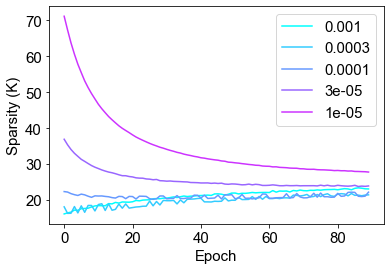

In [33]:
for i, d in enumerate(data):
    plt.plot(d, color=colors[i])
plt.legend(legend)
plt.ylabel('Sparsity (K)')
plt.xlabel('Epoch')